<a href="https://colab.research.google.com/github/Nickolay212/Text/blob/main/HW17_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, \
              SpatialDropout1D, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils  

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –Ω–∞ —Ñ—Ä–∞–≥–º–µ–Ω—Ç—ã –Ω–∞ –±–∞–∑–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –≥—Ä–∞–∂–¥–∞–Ω –≤ –æ—Ä–≥–∞–Ω—ã –≤–ª–∞—Å—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–∑–º–µ—Ä –±–ª–æ–∫–∞ - 20 —Å–ª–æ–≤, —à–∞–≥ - 1 —Å–ª–æ–≤–æ.

–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –Ω—É–∂–Ω–æ–≥–æ –æ–±—Ä–∞—â–µ–Ω–∏—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –µ–≥–æ –Ω–∞ —Ñ—Ä–∞–≥–º–µ–Ω—Ç—ã –∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ–º —Ñ—Ä–∞–≥–º–µ–Ω—Ç–æ–≤.

–ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏. –î–æ–±–∞–≤—å—Ç–µ –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å —Å–≤–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏.



# –ê–Ω–∞–ª–∏–∑ –∏ –º–æ–¥–µ–ª–∏ —Å —É—Ä–æ–∫–∞

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/HW17/clean_data.csv')

In [ ]:
base = base.iloc[:,:2]
base

text             category
0      –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –º–æ–∂–Ω–æ –ª–∏ —Å...   –î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç
1      –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∏–º–µ—é—Ç –ª–∏ –ø—Ä–∞–≤–æ –Ω–µ –ø–ª–∞—Ç–∏—Ç...                  –ñ–ö–•
2      " –°–ø–∞—Å–∏–±–æ –í–∞–º –æ–≥—Ä–æ–º–Ω–æ–µ –∑–∞ –≤–æ–∑–æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∏—Ç...        –°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ
3      –ü—Ä–æ–±–ª–µ–º–∞ –æ–¥–Ω–∞ –∏ –æ–±—â–∞—è —Å—Ç–∞–ª–∞ –≤ –≥–æ—Ä–æ–¥–µ. –°–ø–æ—Ä—Ç. —É...                –°–ø–æ—Ä—Ç
4      –ù–µ–∫–æ—Ç–æ—Ä–æ–µ –≤—Ä–µ–º—è –Ω–∞–∑–∞–¥ –¥–ª—è —à–∫–æ–ª—å–Ω–∏–∫–æ–≤ –∏ —Å—Ç—É–¥–µ–Ω—Ç...   –î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç
...                                                  ...                  ...
10054  –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è –∞—Å—Ñ–∞–ª—å—Ç–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –¥–æ—Ä–æ–≥–∞ –≤ –ø. –ó–∞—Ä–µ...  –ë–ª–∞–≥–æ¬≠¬≠—É—Å—Ç—Ä–æ–π¬≠¬≠—Å—Ç–≤–æ
10055  –£–í–ê–ñ–ê–ï–ú–´–ô –ò–ì–û–†–¨ –ì–ï–û–†–ì–ò–ï–í–ò–ß! –í –ü–û–°–ï–õ–ö–ï –õ–ï–í –¢–û–õ–°...  –ë–æ—Ä—å–±–∞ —Å –∫–æ—Ä—Ä—É–ø—Ü–∏–µ–π
10056  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! 19 –∏—é–Ω—è 2019 –≥–æ–¥–∞ –∑–∞—Ç–æ–ø–∏–ª–æ –º–∞–≥–∞–∑...                  –ñ–ö–•
10057  –£–≤–∞–∂–∞–µ–º—ã–π! –ü–æ–º–æ–≥–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ —Ä–µ—à–∏—Ç—å –ø—Ä–æ–±–ª–µ–º—É...                  –ñ–ö–•
10058  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –≤ —Å–≤—è–∑–∏ —Å —Ç–µ—á—å—é –∫—Ä–æ–≤–ª–∏ –º–æ—è –∫–≤–∞—Ä—Ç–∏...                  –ñ–ö–•

[10059 rows x 2 columns]

In [ ]:
base[base.category == '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ']
base.iloc[46].tolist()

['–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ü—Ä–µ–¥–ª–∞–≥–∞—é —Å–æ–∑–¥–∞—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü—É –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ—Ç —Ä–µ–≥—É–ª—è—Ä–Ω–æ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–æ–±–ª–µ–º–Ω—ã—Ö —Å—Ç—Ä–æ–π–∫–∞—Ö –≥–æ—Ä–æ–¥–∞. –ü–æ–∫–∞ –∑–∞ —Ä–µ—à–µ–Ω–∏–µ–º –ø—Ä–æ–±–ª–µ–º –¥–æ–ª—å—à–∏–∫–æ–≤ –º–æ–∂–Ω–æ –Ω–∞–±–ª—é–¥–∞—Ç—å –≤ –º–∞—Ç–µ—Ä–∏–∞–ª–∞—Ö –Ω–æ–≤–æ—Å—Ç–Ω—ã—Ö –°–ú–ò, –¥–∞ –∏ —Ç–æ –Ω–µ –æ –≤—Å–µ—Ö. (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–µ –õ–ò–°–ö –∏ –µ–≥–æ –ø—Ä–æ–±–ª–µ–º–∞—Ö). –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü–∞ –≤ —Å–æ—Ü—Å–µ—Ç–∏, –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å–∞–π—Ç, –ª–∏–±–æ —Ä–∞–∑–¥–µ–ª –Ω–∞ —ç—Ç–æ–º —Ä–µ—Å—É—Ä—Å–µ, –≥–¥–µ –∫–∞–∂–¥—ã–π –¥–æ–ª—å—â–∏–∫ –º–æ–≥ –±—ã –º–æ–Ω–∏—Ç–æ—Ä–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —Å–≤–æ–µ–º—É –¥–æ–º—É. –≠—Ç–æ –±—ã–ª–æ –±—ã –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ!',
 '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ']

In [ ]:
for cl in base['category'].unique():
  print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ ', cl, ': ', base[base['category'] == cl].shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç :  1411
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –ñ–ö–• :  2063
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ :  349
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –°–ø–æ—Ä—Ç :  246
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –ë–ª–∞–≥–æ¬≠¬≠—É—Å—Ç—Ä–æ–π¬≠¬≠—Å—Ç–≤–æ :  1686
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ –Ω–∞—É–∫–∞ :  290
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –ö—É–ª—å—Ç—É—Ä–∞ :  100
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –î–µ–º–æ–≥—Ä–∞—Ñ–∏—è :  20
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞ :  370
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –î—Ä—É–≥–æ–µ :  208
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –ë–∏–∑–Ω–µ—Å :  187
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞  –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ :  368
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å

In [ ]:
base.text[46]

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ü—Ä–µ–¥–ª–∞–≥–∞—é —Å–æ–∑–¥–∞—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü—É –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ—Ç —Ä–µ–≥—É–ª—è—Ä–Ω–æ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–æ–±–ª–µ–º–Ω—ã—Ö —Å—Ç—Ä–æ–π–∫–∞—Ö –≥–æ—Ä–æ–¥–∞. –ü–æ–∫–∞ –∑–∞ —Ä–µ—à–µ–Ω–∏–µ–º –ø—Ä–æ–±–ª–µ–º –¥–æ–ª—å—à–∏–∫–æ–≤ –º–æ–∂–Ω–æ –Ω–∞–±–ª—é–¥–∞—Ç—å –≤ –º–∞—Ç–µ—Ä–∏–∞–ª–∞—Ö –Ω–æ–≤–æ—Å—Ç–Ω—ã—Ö –°–ú–ò, –¥–∞ –∏ —Ç–æ –Ω–µ –æ –≤—Å–µ—Ö. (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–µ –õ–ò–°–ö –∏ –µ–≥–æ –ø—Ä–æ–±–ª–µ–º–∞—Ö). –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü–∞ –≤ —Å–æ—Ü—Å–µ—Ç–∏, –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å–∞–π—Ç, –ª–∏–±–æ —Ä–∞–∑–¥–µ–ª –Ω–∞ —ç—Ç–æ–º —Ä–µ—Å—É—Ä—Å–µ, –≥–¥–µ –∫–∞–∂–¥—ã–π –¥–æ–ª—å—â–∏–∫ –º–æ–≥ –±—ã –º–æ–Ω–∏—Ç–æ—Ä–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —Å–≤–æ–µ–º—É –¥–æ–º—É. –≠—Ç–æ –±—ã–ª–æ –±—ã –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ!'

–¢–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã —Å –Ω–µ–ø–æ–ª–Ω—ã–µ (nan, –≥–¥–µ —Ç–æ 2000, –≥–¥–µ —Ç–æ 100 –ø—Ä–∏–º–µ—Ä–æ–≤), –Ω–µ–π—Ä–æ–Ω–∫–∞ –Ω–µ —Å–ø—Ä–∞–≤–∏—Ç—Å—è —Å –∑–∞–¥–∞—á–µ–π.
–ü–æ—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä–∫—É.

In [ ]:
maxCounts = 400
minCounts = 300
base = base.dropna().reset_index()

for cl in base.category.unique():
  init = base[base.category == cl].shape[0]
  if base[base.category == cl].shape[0] < minCounts:
    base.drop(base[base.category == cl].index, inplace=True)
  if base[base.category == cl].shape[0] > maxCounts:
    base.drop(base[base.category == cl].index[maxCounts:], inplace=True)
  print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ ', cl, ': ', init, '. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: ', base[base.category == cl].shape[0], sep='')
base = base.reset_index() 

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç: 1411. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 400
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –ñ–ö–•: 2063. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 400
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ: 349. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 349
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –°–ø–æ—Ä—Ç: 246. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –ë–ª–∞–≥–æ¬≠¬≠—É—Å—Ç—Ä–æ–π¬≠¬≠—Å—Ç–≤–æ: 1686. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 400
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ –Ω–∞—É–∫–∞: 290. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –ö—É–ª—å—Ç—É—Ä–∞: 100. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –î–µ–º–æ–≥—Ä–∞—Ñ–∏—è: 20. –í –≤—ã–±–æ—Ä–∫—É –≤–æ—à–ª–æ: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –∫–ª–∞—Å—Å–∞ –°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞: 370. –í –≤—ã–±–æ—Ä

In [ ]:
texts = base.text.values  
Classe = list(base.category.values)
maxWordscount = 1000
nClasse = base.category.nunique()+1
list_pro2 = []
texts

array(['–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –º–æ–∂–Ω–æ –ª–∏ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ–µ–∑–¥ –¥–ª—è —à–∫–æ–ª—å–Ω–∏–∫–æ–≤ –ø–æ –ª—å–≥–æ—Ç–Ω–æ–π —Ü–µ–Ω–µ. –î–ª—è –ª—é–¥–µ–π —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö –≤ –±—é–¥–∂–µ—Ç–Ω–æ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, —Å –¥–µ—Ç—å–º–∏ –Ω–∞ –ø—Ä–æ–µ–∑–¥ —É—Ö–æ–¥–∏—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç—å –¥–µ–Ω–µ–≥ –Ω–∞ –æ–ø–ª–∞—Ç—É –ø—Ä–æ–µ–∑–¥–∞ .',
       '–ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∏–º–µ—é—Ç –ª–∏ –ø—Ä–∞–≤–æ –Ω–µ –ø–ª–∞—Ç–∏—Ç—å –∫–∞–∫–ø —Ä–µ–º–æ–Ω—Ç',
       '" –°–ø–∞—Å–∏–±–æ –í–∞–º –æ–≥—Ä–æ–º–Ω–æ–µ –∑–∞ –≤–æ–∑–æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–∞ –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω–∞ –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–π. –ï—Å—Ç—å –ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–µ—É—Å—Ç–æ–π–∫–∏ –∑–∞ —Å—Ä—ã–≤ —Å—Ä–æ–∫–∞ —Å–¥–∞—á–∏ –¥–æ–º–∞ # 10 ? ? –ò–º–µ–µ—Ç—Å—è —Ä–µ—à–µ–Ω–∏–µ —Å—É–¥–∞ –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ª–∏—Å—Ç. –°–ø–∞—Å–∏–±–æ –∑–∞ –≤–Ω–∏–º–∞–Ω–∏–µ. "',
       ...,
       '–ü–æ—á–µ–º—É –Ω–∞ —Å–∞–π—Ç–

## –î–ª—è Dense - Bag_of_words - –º–∞—Å—Å–∏–≤ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é –∏–∑ 0 

In [ ]:
token = Tokenizer(num_words = maxWordscount, \
                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', oov_token = 'unknown')
token.fit_on_texts(texts)
#–î–∞–Ω–Ω—ã–µ
xAll = token.texts_to_matrix(texts)
xAll.shape

(2287, 1000)

In [ ]:
encoder = LabelEncoder()
encoder.fit(Classe)
classesEnc = encoder.transform(Classe)
print(classesEnc.max())
#–ö–ª–∞—Å—Å—ã
yAll = utils.to_categorical(classesEnc, nClasse)
yAll.shape

5


(2287, 7)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(xAll, yAll, test_size = 0.2, shuffle = True)
print(xtrain.shape, xval.shape, ytrain.shape, yval.shape)

(1829, 1000) (458, 1000) (1829, 7) (458, 7)


Epoch 1/17
15/15 [==============================] - 1s 14ms/step - loss: 2.1182 - accuracy: 0.2596 - val_loss: 1.5967 - val_accuracy: 0.5306
Epoch 2/17
15/15 [==============================] - 0s 5ms/step - loss: 0.9368 - accuracy: 0.6882 - val_loss: 1.4363 - val_accuracy: 0.6135
Epoch 3/17
15/15 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.8250 - val_loss: 1.3622 - val_accuracy: 0.6376
Epoch 4/17
15/15 [==============================] - 0s 5ms/step - loss: 0.4200 - accuracy: 0.8878 - val_loss: 1.3043 - val_accuracy: 0.6594
Epoch 5/17
15/15 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9350 - val_loss: 1.2564 - val_accuracy: 0.6790
Epoch 6/17
15/15 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.9550 - val_loss: 1.2167 - val_accuracy: 0.6790
Epoch 7/17
15/15 [==============================] - 0s 5ms/step - loss: 0.1696 - accuracy: 0.9717 - val_loss: 1.1801 - val_accuracy: 0.6790
Epoch 8/17
15/15 [=

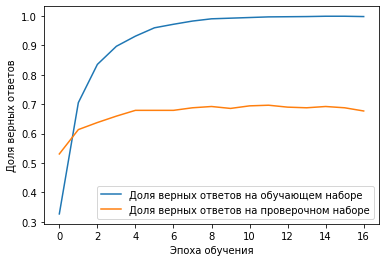

In [ ]:
def model_():
  #–°–æ–∑–¥–∞—ë–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é —Å–µ—Ç—å
  model01 = Sequential()
  #–ü–µ—Ä–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(200, input_dim=maxWordscount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.25))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–í—ã—Ö–æ–¥–Ω–æ–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(7, activation='softmax'))

  model01.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01

model = model_()
#–û–±—É—á–∞–µ–º —Å–µ—Ç—å –Ω–∞ –≤—ã–±–æ—Ä–∫–µ, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ bag of words - xTrain01
# print('*'*60)
# print(, ' ||')
# print('-'*15)
history = model.fit(xtrain, 
                      ytrain, 
                      epochs=17,
                      batch_size=128,
                      validation_data=(xval, yval))

plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')
list_pro2 += [['model_lesson', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]

## –î–ª—è embedding - to_sequens - –ø–µ—Ä–µ—á–µ–Ω—å —Ç–µ–∫—Å—Ç–∞ –ø–æ –Ω–æ–º–µ—Ä–∞–º –ø–æ–≤—Ç–æ—Ä —Å–ª–æ–≤

In [ ]:
xAllE = token.texts_to_sequences(texts)
xAllE = np.array(xAllE)
xtrainE, xvalE, ytrainE, yvalE = train_test_split(xAllE, yAll, test_size = 0.2, shuffle = True)
print(xtrainE.shape, xvalE.shape, ytrainE.shape, yvalE.shape)

(1829,) (458,) (1829, 7) (458, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


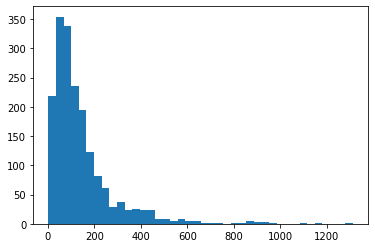

In [ ]:
lenxtr = [len(x) for x in xtrainE]
plt.hist(lenxtr, 40)
plt.show()

Epoch 1/30
29/29 [==============================] - 1s 13ms/step - loss: 2.5336 - accuracy: 0.1785 - val_loss: 1.9021 - val_accuracy: 0.1703
Epoch 2/30
29/29 [==============================] - 0s 7ms/step - loss: 1.7519 - accuracy: 0.2966 - val_loss: 1.8979 - val_accuracy: 0.1834
Epoch 3/30
29/29 [==============================] - 0s 7ms/step - loss: 1.1789 - accuracy: 0.5757 - val_loss: 1.9173 - val_accuracy: 0.1834
Epoch 4/30
29/29 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.8565 - val_loss: 1.8911 - val_accuracy: 0.1834
Epoch 5/30
29/29 [==============================] - 0s 7ms/step - loss: 0.2963 - accuracy: 0.9389 - val_loss: 1.8726 - val_accuracy: 0.1834
Epoch 6/30
29/29 [==============================] - 0s 8ms/step - loss: 0.1634 - accuracy: 0.9811 - val_loss: 1.8620 - val_accuracy: 0.1900
Epoch 7/30
29/29 [==============================] - 0s 7ms/step - loss: 0.1123 - accuracy: 0.9868 - val_loss: 1.8656 - val_accuracy: 0.1856
Epoch 8/30
29/29 [=

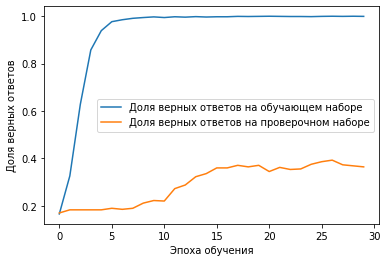

In [ ]:
maxlen = 300
XtrainE = pad_sequences(xtrainE, maxlen = maxlen)
XvalE = pad_sequences(xvalE, maxlen = maxlen)

def model_():
    modelE = Sequential()
    modelE.add(Embedding(maxWordscount, 50, input_length=maxlen))
    modelE.add(SpatialDropout1D(0.2))
    modelE.add(Flatten())
    modelE.add(BatchNormalization())
    modelE.add(Dense(64, activation="relu"))
    modelE.add(Dropout(0.2))
    modelE.add(BatchNormalization())
    modelE.add(Dense(7, activation='softmax'))

    modelE.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return modelE
model = model_()
#–û–±—É—á–∞–µ–º —Å–µ—Ç—å –Ω–∞ –≤—ã–±–æ—Ä–∫–µ, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ bag of words - xTrain01
# print('*'*60)
# print(tt, ' ||')
# print('-'*15)
history = model.fit(XtrainE, 
                      ytrainE, 
                      epochs=30,
                      batch_size=64,
                      validation_data=(XvalE, yvalE))
list_pro2 += [['model_lesson_E', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

# –ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–∏


!!!! –û–±—Ä–∞—â–µ–Ω–∏—è –≥—Ä–∞–∂–¥–∞–Ω –∏–¥–µ—Ç –≤ —Ä–∞–∑–Ω–æ–±–æ–π, –ø–æ—ç—Ç–æ–º—É –ø–µ—Ä–µ–¥–µ–ª–∞–ª —Å–ª–µ–≥–∫–∞ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–º–µ—Ä–æ–≤, —Å –ø–æ–º–æ—â—å—é encoder

In [ ]:
texts = base.text.values  
Classe = list(base.category.values)
nClasse = base.category.nunique()+1

In [ ]:
encoder = LabelEncoder()
encoder.fit(Classe)
classesEnc = encoder.transform(Classe)
print(list(encoder.classes_))
print(classesEnc.shape)
print(classesEnc[:10])
print(Classe[:10])

['–ë–ª–∞–≥–æ\xad\xad—É—Å—Ç—Ä–æ–π\xad\xad—Å—Ç–≤–æ', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–ñ–ö–•', '–ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ', '–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞', '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ']
(2287,)
[1 2 5 1 1 1 1 0 1 1]
['–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–ñ–ö–•', '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–ë–ª–∞–≥–æ\xad\xad—É—Å—Ç—Ä–æ–π\xad\xad—Å—Ç–≤–æ', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–î–æ—Ä–æ–≥–∏ –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç']


In [ ]:
classesEnc.shape[0]

2287

In [ ]:
MaxWordsCount = 1000
xlen = 20 #–î–ª–∏–Ω–∞ –æ—Ç—Ä–µ–∑–∫–∞ —Ç–µ–∫—Å—Ç–∞, –ø–æ –∫–æ—Ç–æ—Ä–æ–π –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º, –≤ —Å–ª–æ–≤–∞—Ö
step = 1 #–®–∞–≥ —Ä–∞–∑–±–∏–µ–Ω–∏—è –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –≤–µ–∫—Ç–æ—Ä—ã
arxiv = []

#I
tokenizer = Tokenizer(num_words=MaxWordsCount, oov_token = 'unknown', char_level = False)

#II
# "–°–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ. –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
tokenizer.fit_on_texts(texts)
#III
trainIndex1 = tokenizer.texts_to_sequences(texts)
# XtrainIndex1, XvalIndex1, YtrainEnc, YvalEnc = train_test_split(trainIndex1, classesEnc, test_size = 0.2, shuffle = True)

#IV
def getsetfromInd(wordIndex,xlen,step): # –§—É–Ω–∫—Ü–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–æ–≤, —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞, —à–∞–≥ –æ–∫–Ω–∞
  xSample = []
  wordlen = len(wordIndex)
  index = 0
  while (index + xlen <= wordlen):
    xSample.append(wordIndex[index:index+xlen])
    index += step
  return xSample
def createSet(wordIndex,xlen,step,classesEnc):
  nClasses = classesEnc.max()+1                                     #!!!labelencoder 6
  
  classX = [] 
  for wi in wordIndex: 
    classX.append(getsetfromInd(wi,xlen,step))                      #!!!–≤—Å–µ –∑–Ω–∞—á –ø–æ –∫–ª–∞—Å—Å–∞–º
  xSamples = []
  ySamples = []
  for i in range(classesEnc.shape[0]): #2287
    xT = classX[i]
    for t in range(len(xT)):
      xSamples.append(xT[t])                             
      ySamples.append(utils.to_categorical(classesEnc[i], nClasses))
  xSamples = np.array(xSamples) # –ü–µ—Ä–µ–≤–æ–¥–∏–º –≤ –º–∞—Å—Å–∏–≤ numpy –¥–ª—è –ø–æ–¥–∞—á–∏ –≤ –Ω–µ–π—Ä–æ–Ω–∫—É
  ySamples = np.array(ySamples) # –ü–µ—Ä–µ–≤–æ–¥–∏–º –≤ –º–∞—Å—Å–∏–≤ numpy –¥–ª—è –ø–æ–¥–∞—á–∏ –≤ –Ω–µ–π—Ä–æ–Ω–∫—É
  return (xSamples, ySamples) #–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—ã–±–æ—Ä–∫—É –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤–µ–∫—Ç–æ—Ä—ã –∫–ª–∞—Å—Å–æ–≤
#IV
xtrain1, ytrain1 = createSet(trainIndex1,xlen,step,classesEnc)

#V
#Bag of words
xtrain01 = tokenizer.sequences_to_matrix(xtrain1.tolist())

xtrain_, xval_, ytrain_, yval_ = train_test_split(xtrain01, ytrain1, train_size = 0.2, shuffle = True)
xtrain_E, xval_E, ytrain_E, yval_E = train_test_split(xtrain1, ytrain1, train_size = 0.2, shuffle = True)


In [ ]:
#--------------------------------------------------------------------------------------------------
def model_():
  #–°–æ–∑–¥–∞—ë–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é —Å–µ—Ç—å
  model01 = Sequential()
  #–ü–µ—Ä–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(200, input_dim=MaxWordsCount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.25))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–í—ã—Ö–æ–¥–Ω–æ–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_()
history = model.fit(xtrain_, ytrain_, 
                      epochs=10,
                      batch_size=64,
                      validation_data= (xval_,yval_))
list_pro2 += [['model_HW', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

#--------------------------------------------------------------------------------------------------
def model_22():
  #–°–æ–∑–¥–∞—ë–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é —Å–µ—Ç—å
  model01 = Sequential()
  #–ü–µ—Ä–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(324, input_dim=MaxWordsCount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.25))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  model01.add(Dense(96, input_dim=MaxWordsCount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.2))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–í—ã—Ö–æ–¥–Ω–æ–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='nadam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_22()
history = model.fit(xtrain_, ytrain_, 
                      epochs=15,
                      batch_size=64,
                      validation_data= (xval_,yval_))
list_pro2 += [['model_HW_twolayers', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

Epoch 1/10
897/897 [==============================] - 10s 11ms/step - loss: 1.8709 - accuracy: 0.2858 - val_loss: 1.1154 - val_accuracy: 0.5830
Epoch 2/10
897/897 [==============================] - 10s 11ms/step - loss: 1.0965 - accuracy: 0.5933 - val_loss: 1.0648 - val_accuracy: 0.5966
Epoch 3/10
897/897 [==============================] - 9s 11ms/step - loss: 1.0194 - accuracy: 0.6203 - val_loss: 1.0528 - val_accuracy: 0.6029
Epoch 4/10
897/897 [==============================] - 9s 11ms/step - loss: 0.9787 - accuracy: 0.6343 - val_loss: 1.0638 - val_accuracy: 0.5968
Epoch 5/10
897/897 [==============================] - 10s 11ms/step - loss: 0.9377 - accuracy: 0.6487 - val_loss: 1.0706 - val_accuracy: 0.5937
Epoch 6/10
897/897 [==============================] - 10s 11ms/step - loss: 0.9136 - accuracy: 0.6566 - val_loss: 1.0880 - val_accuracy: 0.5845
Epoch 7/10
897/897 [==============================] - 10s 11ms/step - loss: 0.8676 - accuracy: 0.6724 - val_loss: 1.0991 - val_accuracy: 0

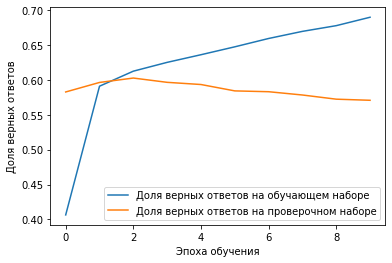

In [ ]:
def model_emb():
  model = Sequential()
  model.add(Embedding(maxWordscount, 40, input_length=xlen))
  model.add(SpatialDropout1D(0.2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense((classesEnc.max()+1), activation='softmax'))
  model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model
model = model_emb()
history = model.fit(xtrain_E, ytrain_E, 
                      epochs=10,
                      batch_size=64,
                      validation_data=(xval_E,yval_E) )
list_pro2 += [['model_HW_E', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

In [ ]:
list_pro2

[['model_HW_E', 0.69, 0.573],
 ['model_HW', 0.942, 0.897],
 ['model_HW_twolayers', 0.961, 0.919],
 ['model_lesson', 0.997, 0.686],
 ['model_lesson_E', 1.0, 0.325]]

In [ ]:
# –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –Ω—É–∂–Ω–æ–≥–æ –æ–±—Ä–∞—â–µ–Ω–∏—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –µ–≥–æ –Ω–∞ —Ñ—Ä–∞–≥–º–µ–Ω—Ç—ã –∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ–º —Ñ—Ä–∞–≥–º–µ–Ω—Ç–æ–≤.

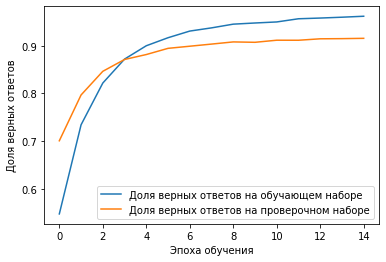

In [ ]:
def model_22():
  #–°–æ–∑–¥–∞—ë–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é —Å–µ—Ç—å
  model01 = Sequential()
  #–ü–µ—Ä–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(324, input_dim=MaxWordsCount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.25))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  model01.add(Dense(96, input_dim=MaxWordsCount, activation="relu"))
  #–°–ª–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ Dropout
  model01.add(Dropout(0.2))
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–°–ª–æ–π –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
  model01.add(BatchNormalization())
  #–í—ã—Ö–æ–¥–Ω–æ–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='nadam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_22()
history = model.fit(xtrain_, ytrain_, 
                      epochs=15,
                      batch_size=64, verbose = False,
                      validation_data= (xval_,yval_))

plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')


In [ ]:
classname = {2:'–ñ–ö–•', 3:'–ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ'}
classname_ = list(encoder.classes_)
#text_internet - –ø–∞—Ä—Å–∏–Ω–≥ –ñ–ö–•, –∑–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–º. –Ω–∏–∂–µ (2,3 –∫–∞—Ç–µ–≥–æ—Ä–∏—è)
texts_int = text_internet.text.values  
Classes_int = list(text_internet.category.values)

#I
tokenizer1 = Tokenizer(num_words=100, oov_token = 'unknown', split=' ', char_level = False)

#II
# "–°–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ. –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
tokenizer1.fit_on_texts(texts_int)
#III
trainIndex11 = tokenizer1.texts_to_sequences(texts_int)

xlen = 10
step = 2

#–ó–∞–Ω–æ–≤–æ –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, —Å–æ–∑–¥–∞–≤–∞—è –º–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–æ–≤ —Å xlen, step
#–ó–∞–Ω–æ–≤–æ —Ç–µ—Å—Ç–æ–≤—É—é –∑–∞–ø–∏—Ö–∏–≤–∞–µ–º –≤ bag of wards
def createTestmultiClasses(wordIndex, xlen, step):
  nClasses = len(wordIndex)
  xTest6Clas01 = []
  xTest6Clas = []
  for wi in wordIndex:
    sample = (getsetfromInd(wi, xlen, step))
    xTest6Clas.append(sample)
    xTest6Clas01.append(tokenizer.sequences_to_matrix(sample))
  xTest6Clas01 = np.array(xTest6Clas01)                     #–ò –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫ –Ω–∞—à–µ–º—É —Å–ø–∏—Å–∫—É, 
  xTest6Clas = np.array(xTest6Clas)   
  return xTest6Clas01, xTest6Clas

#–ò—Å–ø–æ–ª—å–∑—É–µ–º —Å–≤–æ—é –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –≤ bag of wards
#–î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ–∫—Å—Ç
nClasses = classesEnc.max()+1 
def recognizemulticlas(model, xtest, modelName):
  print("–ù–ï–ô–†–û–ù–ö–ê: ", modelName)
  print()
#–ö–æ–≥–¥–∞ –∏–¥–µ–º –ø–æ –∫–ª–∞—Å—Å–∞–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º, —Ç–æ –ø–æ –æ—Ç–¥–µ–ª—å–Ω—ã–º —á–∞—Å—Ç—è–º –º–æ–≥—É—Ç –±—ã—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –Ω–∞ –¥—Ä—É–≥–∏–µ —Ç–µ–∫—Å—Ç—ã,
#–ü–æ—ç—Ç–æ–º—É –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–µ–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç —É –æ–¥–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞ –∏ –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º —Å–∫–æ–ª—å–∫–æ –±—ã–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ç —ç—Ç–æ–≥–æ
#–∞–≤—Ç–æ—Ä–∞ —Å–≤–æ–µ–≥–æ —Ç–µ–∫—Å—Ç–∞.
  totalSum = 0
  sumCount = 0
  #–ø–æ–ª—É—á–∞–µ—Ç—Å—è –≤ currout –±—É–¥—É—Ç –æ—Ç –æ–¥–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞ —Å–∫–æ–ª—å–∫–æ –µ–≥–æ –∏ —Å–∫–æ–ª—å–∫–æ –≤–æ–∑–º–æ–∂–Ω–æ –¥—Ä—É–≥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –Ω–∞ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ
  for i in range(len(xtest)):
    print('i',i)
    currpred = model.predict(xtest[i])
    currout = np.argmax(currpred, axis=1)

    #–û–±–æ–±—â–∞–µ–º –∫ –æ–¥–Ω–æ–º—É –∞–≤—Ç–æ—Ä—É, –∏ –ø–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –≤ –æ–¥–Ω–æ–º –∞–≤—Ç–æ—Ä–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –¥—Ä—É–≥–∏–º–∏
    evval = []
    for j in range(nClasses):
      evval.append(len(currout[currout==j])/ len(xtest[i]))

    #—Å–∫–æ–ª—å–∫–æ –≤ –æ–±—â–µ–º –ø–æ –≤—Å–µ–º –∞–≤—Ç–æ—Ä–∞–º –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —Å–∫–ª–∞–¥—ã–≤–∞–Ω–∏–µ –∏–¥–µ—Ç –≤ –¥–æ–ª—è—Ö –æ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞
    totalSum += len(currout[currout==Classes_int[i]])

    #–í—ã–±–∏—Ä–∞–µ–º —É–∂–µ –∏–∑ –æ–±–æ—â–µ–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º—É –∞–≤—Ç–æ—Ä—É –º–∞–∫—Å–∏–º–∞—å–Ω—É—é –¥–æ–ª—é —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è
    recogClass = np.argmax(evval)
    isrecogClass = '–ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç'
    if (recogClass == Classes_int[i]):
      isrecogClass = '–ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç'
    str1 = '–ö–ª–∞—Å—Å: ' + classname[Classes_int[i]] + " " * (21 - len(classname[Classes_int[i]])) + str(int(100*evval[Classes_int[i]])) + "% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É " + classname_[recogClass]
    print(str1, " " * (55-len(str1)), ' ', isrecogClass, sep='')

    sumCount += len(currout)
  
  # –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º –≤–º–µ—Å—Ç–µ
  print()

  print("–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è ", int(100*totalSum/sumCount), "%", sep='')

  print()
  
  return totalSum/sumCount


xTest6Classes01, x2 = createTestmultiClasses(trainIndex11, xlen, step) #–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
# l = np.array(xTest6Classes01)
# np.save('xTestPredictBoW', l)
# np.save('xTestPredictEmbedding', x2)

pred = recognizemulticlas(model, xTest6Classes01, "–¢–µ–∫—Å—Ç—ã_–∏–Ω—Ç–µ—Ä–Ω–µ—Ç")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


–ù–ï–ô–†–û–ù–ö–ê:  –¢–µ–∫—Å—Ç—ã_–∏–Ω—Ç–µ—Ä–Ω–µ—Ç

i 0
–ö–ª–∞—Å—Å: –ñ–ö–•                  21% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 1
–ö–ª–∞—Å—Å: –ñ–ö–•                  15% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 2
–ö–ª–∞—Å—Å: –ñ–ö–•                  41% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ñ–ö–• –ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç
i 3
–ö–ª–∞—Å—Å: –ñ–ö–•                  19% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 4
–ö–ª–∞—Å—Å: –ñ–ö–•                  12% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 5
–ö–ª–∞—Å—Å: –ñ–ö–•                  40% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ñ–ö–• –ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç
i 6
–ö–ª–∞—Å—Å: –ñ–ö–•                  30% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 7
–ö–ª–∞—Å—Å: 

# –ü–∞—Ä—Å–∏–Ω–≥ –ñ–ö–•, –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ

In [ ]:
import requests #–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –∑–∞–ø—Ä—Å–æ–≤ –≤ –ò–Ω—Ç–µ—Ä–Ω–µ—Ç 
from bs4 import BeautifulSoup #–î–ª—è –ø–∞—Ä—Å–∏–Ω–≥–∞ 
import pandas as pd #–î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ —É–¥–æ–±–Ω—ã–π –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –≤–∏–¥ 
import datetime #–î–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ 
import csv #–î–ª—è —Ä–∞–±–æ—Ç—ã —Å csv
import urllib.request as urllib2 
from tqdm.notebook import tqdm

url = 'https://roskvartal.ru'
pages = 16
dict_ = {}
list_ = []
dict_['–ñ–ö–•'] = []
for p in range(1,pages+1):
  r = requests.get('https://roskvartal.ru/pro-zhkh/gis-zhkh/',params = {'':p}) #–§–æ—Ä–º–∏—Ä—É–µ–º –∑–∞–ø—Ä–æ—Å 
  print(r)
  soup = BeautifulSoup(r.text) #–ü–∞—Ä—Å–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π html
  print(p)
  temps = soup.findAll('h2', {'class':"discussion-title"}) #–ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –±–ª–æ–∫–∏ —Å –º–∞—Ç—á–∞–º–∏
  print(temps)
  for cell in tqdm(temps):
    y=cell.find('a').get('href')
    url = "https://roskvartal.ru" + y
    page = urllib2.urlopen(url)
    soups = BeautifulSoup(page.read())
    list_ += [soups.find('div', {'class':'comment-body'}).text]
dict_['–ñ–ö–•'] = list_
base = pd.DataFrame(list_)
base.to_csv('/content/drive/MyDrive/HW17/JKX.csv', index=None)

((57362, 20), (57362, 6))

In [ ]:
JKX = pd.read_csv('/content/drive/MyDrive/HW17/JKX.csv', names = ['text'])
JKX = JKX.loc[1:477]
JKX= JKX.reset_index()
JKX['category'] = 2

In [ ]:
pages = 102
dict_ = {}
list_ = []
# dict_[''] = []
for p in range(1,pages+1):
  r = requests.get('http://vopros-otvet.avo.ru/viewforum.php?id=16', params = {'&p=': p}) #–§–æ—Ä–º–∏—Ä—É–µ–º –∑–∞–ø—Ä–æ—Å 
  # print(r)
  soup = BeautifulSoup(r.text) #–ü–∞—Ä—Å–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π html
  # print(p)
  temps = soup.findAll('h3', {'class':"hn"}) #–ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –±–ª–æ–∫–∏ —Å –º–∞—Ç—á–∞–º–∏
  # print(temps)
  for cell in tqdm(temps):
    y=cell.find('a').get('href')
    req = requests.get(y) #–§–æ—Ä–º–∏—Ä—É–µ–º –∑–∞–ø—Ä–æ—Å 
    soups = BeautifulSoup(req.text)
    temp = soups.find('div', {'class':'entry-content'}).text
    list_ += [temp.replace('\n', '')]
d = pd.DataFrame(list_)
d.to_csv('/content/drive/MyDrive/HW17/Health.csv', index=None)

In [ ]:
health_care = pd.read_csv('/content/drive/MyDrive/HW17/Health.csv', names = ['text'])
health_care = health_care.loc[1:477]
health_care = health_care.reset_index()
health_care['category'] = 3
health_care

index                                               text  category
0        1  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ö–∞–∫ –ø–æ–ª—É—á–∏—Ç—å –ø—É—Ç–µ–≤–∫—É –≤ —Å–∞–Ω–∞—Ç–æ—Ä–∏–π ...         3
1        2  –î–æ–±—Ä—ã–π –¥–µ–Ω—å.–î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ–π –ø–æ–º–æ...         3
2        3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å.–°–æ–≥–ª–∞—Å–Ω–æ –ø–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—é –ü—Ä–∞–≤–∏—Ç–µ–ª—å—Å—Ç...         3
3        4  —è –∑–∞–±–æ–ª–µ–ª–∞ 10.12.20–≥ –ø–æ—Å—Ç–∞–≤–∏–ª–∏ –¥–∏–∞–≥–Ω–æ–∑ –û–†–í–ò.–°–æ...         3
4        5  08.12.20 –±—ã–ª–∞ –∑–∞–ø–∏—Å–∞–Ω–∞ —á–µ—Ä–µ–∑ —Å–∞–π—Ç –ì–æ—Å—É—Å–ª—É–≥–∏ –Ω–∞...         3
..     ...                                                ...       ...
472    473  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –°–∫–∞–∂–∏—Ç–µ –∫—É–¥–∞ –∂–∞–ª–æ–≤–∞—Ç—å—Å—è –Ω–∞ –¥–æ–ª–≥–∏–π...         3
473    474  –í –¥–µ—Ç—Å–∫–æ–π –ø–æ–ª–∏–∫–ª–∏–Ω–∏–∫–µ –≤ –≥. –ì—É—Å—å-–•—Ä—É—Å—Ç–∞–ª—å–Ω–æ–º –æ—Ç...         3
474    475  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –í–æ–ø—Ä–æ—Å –±–µ–∑–æ—Ç–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã–π. –ú–æ—é —Ä–æ–¥...         3
475    476  –ù–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–ø–∞—Å—Ç—å –∫–æ –≤—Ä–∞—á—É –≤ –ø–µ—Ä–≤–æ–π –≥–æ—Ä–æ–¥—Å–∫–æ–π...         3
476    477  –£—Ç–æ—á–Ω–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –¥–æ–±–∞–≤–∏–ª–∏ –ª–∏ –≤ –±–∞–∑—É –ì–ë–£–ó#...         3

[477 rows x 3 columns]

In [ ]:
text_internet = pd.concat([JKX, health_care])
text_internet = text_internet.reset_index()
text_internet.drop(['level_0', 'index'], axis = 1, inplace = True)

In [ ]:
text_internet.to_csv('/content/drive/MyDrive/HW17/textinternet.csv')

In [ ]:
text_internet['count'] = 1
for i in range(text_internet.shape[0]):
  text_internet.iat[i,2] = len(text_internet.iloc[i].text.split())

In [ ]:
#–¢–∞–∫ –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ –∏–º–µ–µ—Ç—Å—è –æ—Ç 8 (—Å–ª–æ–≤), —Ç–æ —Å–¥–µ–ª–∞–µ–º
#—Ñ–∏–ª—å—Ç—Ä, –≥–¥–µ –≤—ã–±–µ—Ä–µ–º —Å—Ç—Ä–æ—á–∫–∏ > 20 —Å–ª–æ–≤ –≤ –æ–ø—Ä–æ—Å–µ
text_internet = text_internet.loc[text_internet['count'] > 20].reset_index().drop(['index'],axis=1)

In [ ]:
text_internet

text  category  count
0    –î–æ–±—Ä—ã–π –¥–µ–Ω—å) –≤–Ω–µ—Å–ª–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞–∑–º–µ—Ä–µ –ø–ª–∞—Ç—ã...         2     36
1    –î–æ–≥–æ–≤–æ—Ä–∞ - –†–°–û —Å –£–ö –ø–æ –ö–† –Ω–∞ –°–û–ò / –û–î–ù (–≤ —Ä–∞–º–∫...         2     79
2    –§–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º –∑–∞–∫–æ–Ω–æ–º –æ—Ç 25.05.2020 ‚Ññ 156-–§–ó ¬´–û ...         2     63
3    –£ –Ω–∞—Å –µ—Å—Ç—å –ø–ª–∞—Ç–µ–∂–Ω—ã–π –∞–≥–µ–Ω—Ç —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Ü–µ–Ω—Ç—Ä,¬†–Ω–æ...         2     50
4    –ú–µ–∂–¥—É —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º–∏ –ú–ö–î –∏ –†–°–û –∑–∞–∫–ª—é—á–µ–Ω—ã –ø—Ä—è–º—ã...         2     26
..                                                 ...       ...    ...
753  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –°–∫–∞–∂–∏—Ç–µ –∫—É–¥–∞ –∂–∞–ª–æ–≤–∞—Ç—å—Å—è –Ω–∞ –¥–æ–ª–≥–∏–π...         3     33
754  –í –¥–µ—Ç—Å–∫–æ–π –ø–æ–ª–∏–∫–ª–∏–Ω–∏–∫–µ –≤ –≥. –ì—É—Å—å-–•—Ä—É—Å—Ç–∞–ª—å–Ω–æ–º –æ—Ç...         3    149
755  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –í–æ–ø—Ä–æ—Å –±–µ–∑–æ—Ç–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã–π. –ú–æ—é —Ä–æ–¥...         3     99
756  –ù–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–ø–∞—Å—Ç—å –∫–æ –≤—Ä–∞—á—É –≤ –ø–µ—Ä–≤–æ–π –≥–æ—Ä–æ–¥—Å–∫–æ–π...         3    144
757  –£—Ç–æ—á–Ω–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –¥–æ–±–∞–≤–∏–ª–∏ –ª–∏ –≤ –±–∞–∑—É –ì–ë–£–ó#...         3     55

[758 rows x 3 columns]

# –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏. –î–æ–±–∞–≤—å—Ç–µ –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å —Å–≤–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏.

In [ ]:
# !pip install pymorphy2
import pymorphy2
from tqdm.notebook import tqdm
morph = pymorphy2.MorphAnalyzer()
array_int = []

def delete_signs(text,*d):
  for i in d:
    text = text.replace(i, ' ')
  return text

texts_int = text_internet.text.values  
for cel in tqdm(texts_int):
  cel = delete_signs(cel, '.', ',', '(', ')', '!', '?', '\xa0', '  ')
  
  str_ = ''
  
  for i in cel.split():
    str_ += morph.parse(i)[0].normal_form + ' '
    
  array_int.append()


['–¥–æ–±—Ä—ã–π –¥–µ–Ω—å –≤–Ω–µ—Å—Ç–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ä–∞–∑–º–µ—Ä –ø–ª–∞—Ç–∞ –∑–∞ —Å–æ–¥–µ—Ä–∞–Ω–∏–µ –∂–∏–ª—å—ë –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –µ—Ä–µ–∑–∞ –¥–æ–≥–æ–≤–æ—Ä —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—ã—Ç–∞—Ç—å—Å—è –∑–∞–≥—Ä—É–∑–∏—Ç—å –ø–ª–∞—Ç—ë–∂–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç –Ω–æ –Ω–µ –≤–∏–¥–µ—Ç—å –≤–Ω–µ—Å—Ç–∏ —è –¥–∞—Ç—å –∏–ª–∏ —Ç–∞–∫ –∂–µ —Å—É—Ç–∫–∏ –ø—Ä–æ–π—Ç–∏ –¥–æ–ª–∂–Ω—ã–π —Å –º—Ä–º–µ–Ω—Ç –≤–Ω–µ—Å–µ–Ω–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–µ ',
 '–¥–æ–≥–æ–≤–æ—Ä - —Ä—Å–æ —Å —É–∫ –ø–æ –∫—Ä –Ω–∞ —Å–æ—è / –æ–¥–Ω –≤ —Ä–∞–º–∫–∞ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã–π –≤–∏–¥ –¥–æ–≥–æ–≤–æ—Ä –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –¥–ª—è —Ä–∞–∑–º–µ—â–µ–Ω–∏–µ –≤ –≥–∏—Å –∂–∫—Ö –∫—Ç–æ –æ–Ω –¥–æ–ª–∂–Ω—ã–π —Ä–∞–∑–º–µ—â–∞—Ç—å—Å—è —Ä—Å–æ –∏–ª–∏ —É–∫ –∏ –≤ –∫–∞–∫–æ–π —Å–ª—É—á–∞—è—Ö: –µ—Å–ª–∏ –¥–æ–º –Ω–∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –∏–ª–∏ —Å –≤—ã–±—Ä–∞—Ç—å –ø—Ä—è–º–æ–π –¥–æ–≥–æ–≤–æ—Ä -–∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å —è–≤–ª—è—Ç—å—Å—è —É–∫ –æ–Ω–∞ –≤–µ–¥—å –≤–Ω–æ—Å–∏—Ç—å—Å—è –∫–∞–∫ –∂–∏–ª–∏—â–Ω—ã–π —É—Å–ª—É–≥–∞ –≤ —Ä–∞–º–∫–∞ –¥–æ–≥–æ–≤–æ—Ä —É–ø—Ä–∞–≤–ª–µ–Ω–∏

In [ ]:
array_int = np.array(array_int)

In [ ]:
classname = {2:'–ñ–ö–•', 3:'–ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ'}
classname_ = list(encoder.classes_)
#text_internet - –ø–∞—Ä—Å–∏–Ω–≥ –ñ–ö–•, –∑–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–º. –Ω–∏–∂–µ (2,3 –∫–∞—Ç–µ–≥–æ—Ä–∏—è)
texts_int = array_int 
Classes_int = list(text_internet.category.values)

#I
tokenizer1 = Tokenizer(num_words=100, oov_token = 'unknown', split=' ', char_level = False)

#II
# "–°–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ. –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
tokenizer1.fit_on_texts(texts_int)
#III
trainIndex11 = tokenizer1.texts_to_sequences(texts_int)

xlen = 6
step = 2

#–ó–∞–Ω–æ–≤–æ –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, —Å–æ–∑–¥–∞–≤–∞—è –º–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–æ–≤ —Å xlen, step
#–ó–∞–Ω–æ–≤–æ —Ç–µ—Å—Ç–æ–≤—É—é –∑–∞–ø–∏—Ö–∏–≤–∞–µ–º –≤ bag of wards
def createTestmultiClasses(wordIndex, xlen, step):
  nClasses = len(wordIndex)
  xTest6Clas01 = []
  xTest6Clas = []
  for wi in wordIndex:
    sample = (getsetfromInd(wi, xlen, step))
    xTest6Clas.append(sample)
    xTest6Clas01.append(tokenizer.sequences_to_matrix(sample))
  xTest6Clas01 = np.array(xTest6Clas01)                     #–ò –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫ –Ω–∞—à–µ–º—É —Å–ø–∏—Å–∫—É, 
  xTest6Clas = np.array(xTest6Clas)   
  return xTest6Clas01, xTest6Clas

#–ò—Å–ø–æ–ª—å–∑—É–µ–º —Å–≤–æ—é –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –≤ bag of wards
#–î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ–∫—Å—Ç
nClasses = classesEnc.max()+1 
def recognizemulticlas(model, xtest, modelName):
  print("–ù–ï–ô–†–û–ù–ö–ê: ", modelName)
  print()
#–ö–æ–≥–¥–∞ –∏–¥–µ–º –ø–æ –∫–ª–∞—Å—Å–∞–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º, —Ç–æ –ø–æ –æ—Ç–¥–µ–ª—å–Ω—ã–º —á–∞—Å—Ç—è–º –º–æ–≥—É—Ç –±—ã—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –Ω–∞ –¥—Ä—É–≥–∏–µ —Ç–µ–∫—Å—Ç—ã,
#–ü–æ—ç—Ç–æ–º—É –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–µ–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç —É –æ–¥–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞ –∏ –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º —Å–∫–æ–ª—å–∫–æ –±—ã–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ç —ç—Ç–æ–≥–æ
#–∞–≤—Ç–æ—Ä–∞ —Å–≤–æ–µ–≥–æ —Ç–µ–∫—Å—Ç–∞.
  totalSum = 0
  sumCount = 0
  #–ø–æ–ª—É—á–∞–µ—Ç—Å—è –≤ currout –±—É–¥—É—Ç –æ—Ç –æ–¥–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞ —Å–∫–æ–ª—å–∫–æ –µ–≥–æ –∏ —Å–∫–æ–ª—å–∫–æ –≤–æ–∑–º–æ–∂–Ω–æ –¥—Ä—É–≥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –Ω–∞ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ
  for i in range(len(xtest)):
    print('i',i)
    currpred = model.predict(xtest[i])
    currout = np.argmax(currpred, axis=1)

    #–û–±–æ–±—â–∞–µ–º –∫ –æ–¥–Ω–æ–º—É –∞–≤—Ç–æ—Ä—É, –∏ –ø–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –≤ –æ–¥–Ω–æ–º –∞–≤—Ç–æ—Ä–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –¥—Ä—É–≥–∏–º–∏
    evval = []
    for j in range(nClasses):
      evval.append(len(currout[currout==j])/ len(xtest[i]))

    #—Å–∫–æ–ª—å–∫–æ –≤ –æ–±—â–µ–º –ø–æ –≤—Å–µ–º –∞–≤—Ç–æ—Ä–∞–º –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —Å–∫–ª–∞–¥—ã–≤–∞–Ω–∏–µ –∏–¥–µ—Ç –≤ –¥–æ–ª—è—Ö –æ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ—Ä–∞
    totalSum += len(currout[currout==Classes_int[i]])

    #–í—ã–±–∏—Ä–∞–µ–º —É–∂–µ –∏–∑ –æ–±–æ—â–µ–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º—É –∞–≤—Ç–æ—Ä—É –º–∞–∫—Å–∏–º–∞—å–Ω—É—é –¥–æ–ª—é —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è
    recogClass = np.argmax(evval)
    isrecogClass = '–ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç'
    if (recogClass == Classes_int[i]):
      isrecogClass = '–ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç'
    str1 = '–ö–ª–∞—Å—Å: ' + classname[Classes_int[i]] + " " * (21 - len(classname[Classes_int[i]])) + str(int(100*evval[Classes_int[i]])) + "% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É " + classname_[recogClass]
    print(str1, " " * (55-len(str1)), ' ', isrecogClass, sep='')

    sumCount += len(currout)
  
  # –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º –≤–º–µ—Å—Ç–µ
  print()

  print("–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è ", int(100*totalSum/sumCount), "%", sep='')

  print()
  
  return totalSum/sumCount


xTest6Classes01, x2 = createTestmultiClasses(trainIndex11, xlen, step) #–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
# l = np.array(xTest6Classes01)
# np.save('xTestPredictBoW', l)
# np.save('xTestPredictEmbedding', x2)

pred = recognizemulticlas(model, xTest6Classes01, "–¢–µ–∫—Å—Ç—ã_–∏–Ω—Ç–µ—Ä–Ω–µ—Ç")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


–ù–ï–ô–†–û–ù–ö–ê:  –¢–µ–∫—Å—Ç—ã_–∏–Ω—Ç–µ—Ä–Ω–µ—Ç

i 0
–ö–ª–∞—Å—Å: –ñ–ö–•                  25% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ñ–ö–• –ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç
i 1
–ö–ª–∞—Å—Å: –ñ–ö–•                  28% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ñ–ö–• –ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç
i 2
–ö–ª–∞—Å—Å: –ñ–ö–•                  38% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 3
–ö–ª–∞—Å—Å: –ñ–ö–•                  39% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 4
–ö–ª–∞—Å—Å: –ñ–ö–•                  30% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 5
–ö–ª–∞—Å—Å: –ñ–ö–•                  34% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ù–µ –ø—Ä–∞–≤ –æ—Ç–≤–µ—Ç
i 6
–ö–ª–∞—Å—Å: –ñ–ö–•                  60% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ñ–ö–• –ü—Ä–∞–≤–∏–ª—å –æ—Ç–≤–µ—Ç
i 7
–ö–ª–∞—Å—Å: –ñ–ö–•                 

–í–´–í–û–î:

1) –†–∞–±–æ—Ç–∞ —Å –æ—Ç–∑—ã–≤–∞–º–∏ —Å–ª–æ–∂–Ω–∞ —Ç–µ–º, —á—Ç–æ —ç—Ç–æ —Ä–∞–∑–≥–æ–≤–æ—Ä–Ω—ã–π —è–∑—ã–∫, –ø–æ—ç—Ç–æ–º—É –º–Ω–æ–≥–æ —Å–æ–∫—Ä–∞—â–µ–Ω–∏–π –∏ –æ—à–∏–±–æ–∫ –≤ —Å–ª–æ–≤–∞—Ö. –ü–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–ª–æ–≤–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ –Ω–∞—á–∞–ª—å–Ω—É—é —Ñ–æ—Ä–º—É. –¢–∞–∫–∂–µ –ø–µ—Ä–µ–¥ —ç—Ç–∏–º —É–±–∞—Ç—å –≤—Å–µ –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ, —Å–∫–∞—á–∞–≤ –ø—Ä–æ–≤–µ—Ä–µ–Ω–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å, —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º —á–µ—Ä–µ–∑ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –õ–µ–≤–µ–Ω—à—Ç–µ–π–Ω–∞ –¥–ª—è –≤–æ–∑–º–µ—â–µ–Ω–∏—è —Å–æ–∫—Ä–∞—â–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤ –∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ–ø–µ—á–∞—Ç–æ–∫.

2) –£—Å–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º –º–æ–∂–Ω–æ, –µ—Å–ª–∏ –ø–æ–∏–≥—Ä–∞—Ç—å—Å—è —Å —à–∞–≥–æ–º –∏ –¥–ª–∏–Ω–æ–π –æ–∫–Ω–∞. –í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, –µ—Å–ª–∏ —Ç–µ–∫—Å—Ç –Ω–µ –∫–æ—Ä–æ—Ç–∫–∏–π (–æ—Ç 20), —Ç–æ –ª—É—á—à–µ –≤—Å–µ–≥–æ —à–∞–≥ –¥–µ–ª–∞—Ç—å 2, –∞ –¥–ª–∏–Ω—É –æ–∫–Ω–∞ 6.

3) –ß–µ—Ä–µ–∑ embbeding –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –±–æ–ª—å—à—É—é –æ—à–∏–±–∫—É –∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ
